# Build network using user-defined resources

This notebook explores how to add other individual resources from Omnipath or other public databases.

In [1]:
%%time
from neko.core.network import Network
from neko._visual.visualize_network import NetworkVisualizer
from neko._inputs.resources import Resources
from neko._annotations.gene_ontology import Ontology
import omnipath as op

CPU times: user 14.9 s, sys: 494 ms, total: 15.4 s
Wall time: 16.4 s


## 1. Adding a resource already in Omnipath



### 1A. Specify the interaction resource of interest

In [2]:
extra = op.interactions.LigRecExtra.get()

0.00B [00:00, ?B/s]

### 1B. Add new resource to the Resources object

In [3]:
resources = Resources()
resources.add_database(extra, reset_index=True)

## 2. Adding a public database

Alternatively, the user might want to use their own interaction databases. We have already implemented the inclusion of some of widely used databases. 

As example, we show here how to integrate the [Signor 3.0](https://signor.uniroma2.it/) database. In order to do so, the User needs to have already downloaded the whole Signor database, available at the following link: [https://signor.uniroma2.it/downloads.php](https://signor.uniroma2.it/downloads.php) or with the following code:. 

### 2A. Add Signor database



In [6]:
resources = Resources()
resources.import_signor_tsv("all_data_30_05_24.tsv") # this function accept only tab separated values

### 
<div class="alert alert-info">

**Note**
    
SIGNOR uses has different identifiers for complexes, protein family, phenotype, etc.
It is possible that the network contains nodes names like "Signor_pf32" or something like this... This is not yet translated, but if you are interested in what those nodes consist of, you can use download their vocabulary for the entities: [https://signor.uniroma2.it/downloads.php](https://signor.uniroma2.it/downloads.php)

</div>  



## 3. Build the network

### 3A. Import genes as network nodes

In [7]:
genes = ["SRC", "NOTCH1", "FAK", "CDH1", "CDH2", "VIM", "MAP4K4", "LATS1", "LATS2", "PTK2B"]

### 3B. Create network object by specifying the interaction resources

In [8]:
new_net1 = Network(genes, resources = resources.interactions)

In [9]:
#Print node dataframe
new_net1.nodes

,Genesymbol,Uniprot,Type
0,SRC,P12931,NaN
1,NOTCH1,P46531,NaN
2,PTK2,Q05397,NaN
3,CDH1,P12830,NaN
4,CDH2,P19022,NaN
5,VIM,P08670,NaN
6,MAP4K4,O95819,NaN
7,LATS1,O95835,NaN
8,LATS2,Q9NRM7,NaN
9,PTK2B,Q14289,NaN


### 3C. Build network

The downstream steps to connect your nodes, are the same. Please see the [Network building](https://omniflow-project.readthedocs.io/en/latest/notebooks/network_building.html) tutorial for detailed explanations of each step.

In [10]:
%%time
new_net1.connect_nodes(only_signed=True, consensus_only=True)

CPU times: user 941 ms, sys: 11.9 ms, total: 953 ms
Wall time: 957 ms


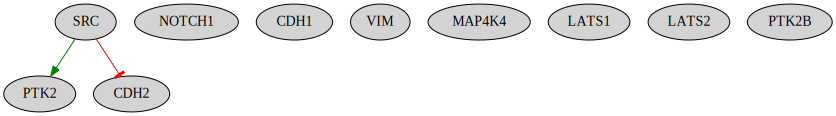

In [11]:
visualizer = NetworkVisualizer(new_net1, color_by='effect')
visualizer.render()

<div class="alert alert-info">

**Note**
    
NB! It is important to note, that not all the databases have the same structure as Omnipath. In particular, if the columns "consensus" are missing, we suggest to avoid to use the flag `consensus` or `consensus_only` when using Omniflow with customize databases.

</div>  

In [12]:
%%time
new_net1.complete_connection(maxlen=6, k_mean="tight", only_signed=True,
                             connect_node_when_first_introduced=True) # here, consensus_only is missing, in this way it is automatically False

CPU times: user 2min 16s, sys: 47.1 ms, total: 2min 16s
Wall time: 2min 16s


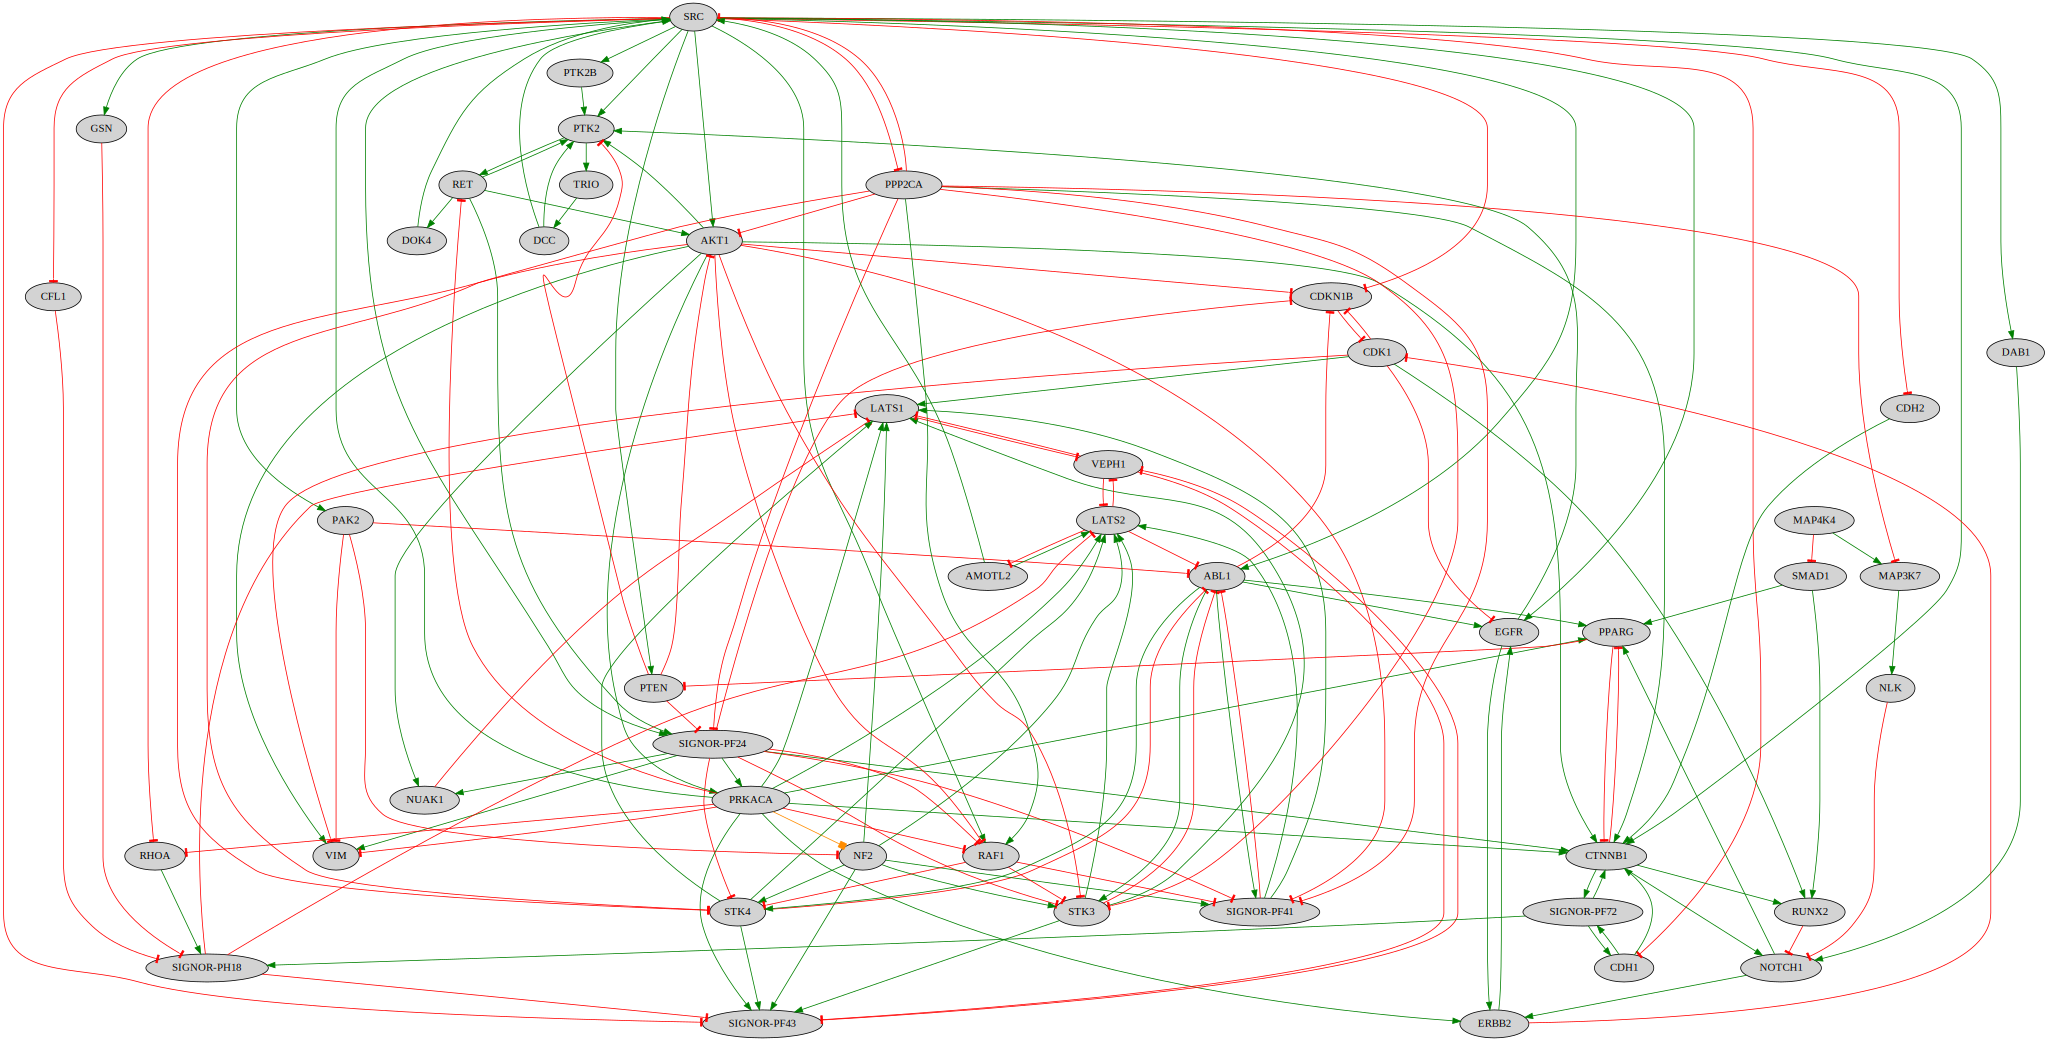

In [13]:
#Visualize network
visualizer1 = NetworkVisualizer(new_net1, color_by='effect')
visualizer1.render()

In [14]:
from neko._outputs.exports import Exports

In [15]:
export = Exports(new_net1)

In [16]:
export.export_bnet()
export.export_sif()

Bimodal interactions:
PRKACA -> NF2
Reference: 18071304
